In [1]:
from endolas import utils

import tensorflow as tf
import numpy as np

from endolas import UNet
from endolas import preprocess_input as pre_une
from endolas import LASTENSequence
from scipy.ndimage import gaussian_filter

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
from skimage.io import imread

from segmentation_models.losses import dice_loss
from segmentation_models.metrics import iou_score

Segmentation Models: using `tf.keras` framework.


In [2]:
plt.rcParams['figure.figsize'] = (15, 15)

In [3]:
try:
  # Disable all GPUS
  tf.config.set_visible_devices([], 'GPU')
  visible_devices = tf.config.get_visible_devices()
  for device in visible_devices:
    assert device.device_type != 'GPU'
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass
print(tf.__version__)
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.config.get_visible_devices('GPU'))
print(tf.config.get_visible_devices('CPU'))

2.2.0-rc3
[]
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
width = 768
height = 768
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN2/validation'

dependencies = {'dice_loss': dice_loss, 'iou_score': iou_score}

model = tf.keras.models.load_model('/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas/experiments/results/3_2_segmentation/best_weights.hdf5', custom_objects=dependencies)

In [5]:
validation_gen = LASTENSequence(path_validation,
                                batch_size=8,
                                preprocess_input=pre_une,
                                width=width,
                                height=height)

In [6]:
X, y = validation_gen[0]

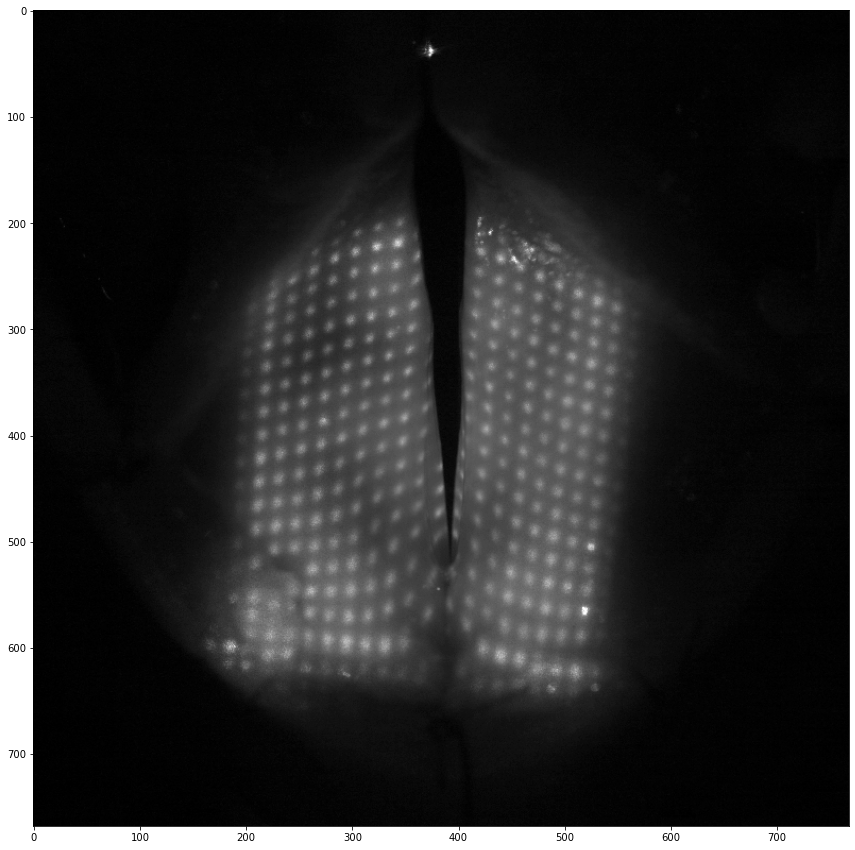

In [7]:
plt.imshow(X[0,:,:,0], cmap='gray')

In [10]:
y.shape

(8, 768, 768, 1)

In [11]:
eval_val = model.evaluate(X,y, batch_size=8)

1/1 [==============================] - 0s 1ms/step - loss: 0.1303 - accuracy: 0.9950 - iou_score: 0.7694


In [12]:
eval_val

[0.1303202509880066, 0.9950093030929565, 0.7694119215011597]

In [18]:
mask = y_pred[0,:,:,0]

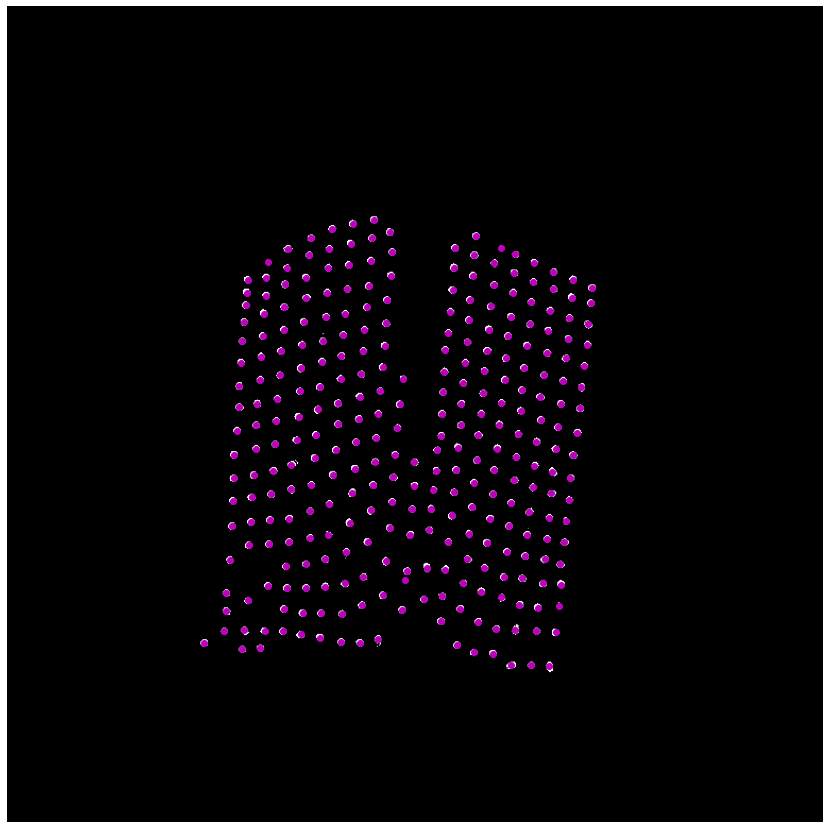

In [23]:
#sk_image = imread('experiments/2_2_segmentation/y_pred.png')

im = mask
#im = img_as_float(sk_image)
#im = img_as_float(data.coins())

im = gaussian_filter(im, sigma=2)

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=1, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=2, threshold_abs=0.1)

# display results
#fig, axes = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)
#ax = axes.ravel()
#ax[0].imshow(im, cmap=plt.cm.gray)
#ax[0].axis('off')
#ax[0].set_title('Original')

#ax[1].imshow(image_max, cmap=plt.cm.gray)
#ax[1].axis('off')
#ax[1].set_title('Maximum filter')

#ax[2].imshow(im, cmap=plt.cm.gray)
#ax[2].autoscale(False)
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
#ax[2].axis('off')
#ax[2].set_title('Peak local max')

#fig.tight_layout()

plt.imshow(mask, cmap="gray")
plt.plot(coordinates[:, 1], coordinates[:, 0], 'mo')
plt.axis('off')
#plt.show()
plt.savefig("7_peaking.png")

In [20]:
coordinates

array([[621, 510],
       [620, 493],
       [620, 474],
       [609, 457],
       [608, 439],
       [605, 221],
       [604, 238],
       [601, 423],
       [599, 332],
       [599, 185],
       [598, 314],
       [595, 349],
       [594, 294],
       [591, 276],
       [589, 516],
       [588, 498],
       [588, 259],
       [588, 242],
       [588, 204],
       [587, 478],
       [587, 223],
       [586, 460],
       [579, 443],
       [578, 408],
       [572, 315],
       [571, 295],
       [571, 278],
       [569, 206],
       [568, 371],
       [567, 426],
       [567, 260],
       [566, 499],
       [564, 519],
       [563, 482],
       [563, 334],
       [559, 226],
       [558, 392],
       [556, 465],
       [555, 409],
       [554, 353],
       [552, 206],
       [551, 446],
       [547, 281],
       [547, 263],
       [546, 299],
       [545, 245],
       [544, 521],
       [543, 504],
       [543, 429],
       [543, 318],
       [540, 374],
       [538, 484],
       [537,

In [21]:
len(coordinates)

301